# Heart Disease Data Analysis

In this work we examine the UCI Heart Disease datase

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart_disease_uci.csv to heart_disease_uci.csv
Saving Heart_Attack.csv to Heart_Attack.csv


In [ ]:
# Load datasets

uci = pd.read_csv('./heart_disease_uci.csv')
ha  = pd.read_csv('./Heart_Attack.csv')

# Display first few rows of each dataset
uci.head(), ha.head()

(   id  age     sex    dataset               cp  trestbps   chol    fbs  \
 0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
 1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
 2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
 3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
 4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   
 
           restecg  thalch  exang  oldpeak        slope   ca  \
 0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
 1  lv hypertrophy   108.0   True      1.5         flat  3.0   
 2  lv hypertrophy   129.0   True      2.6         flat  2.0   
 3          normal   187.0  False      3.5  downsloping  0.0   
 4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   
 
                 thal  num  
 0       fixed defect    0  
 1             normal    2  
 2  reversable defect    1  
 3             normal    0  
 4             no

# UCI

In [ ]:
# Group by dataset and disease status and count samples
disease_counts_by_country_uci = uci.groupby(['dataset', 'num']).size().unstack(fill_value=0)

# Rename columns for clarity
disease_counts_by_country_uci = disease_counts_by_country_uci.rename(columns={0: 'Healthy', 1: 'Diseased_Level_1', 2: 'Diseased_Level_2', 3: 'Diseased_Level_3', 4: 'Diseased_Level_4'})

print("Number of healthy and diseased samples by country (UCI dataset):")
display(disease_counts_by_country_uci)

Number of healthy and diseased samples by country (UCI dataset):


num,Healthy,Diseased_Level_1,Diseased_Level_2,Diseased_Level_3,Diseased_Level_4
dataset,,,,,
Cleveland,165,55,36,35,13
Hungary,187,106,0,0,0
Switzerland,8,48,32,30,5
VA Long Beach,51,56,41,42,10


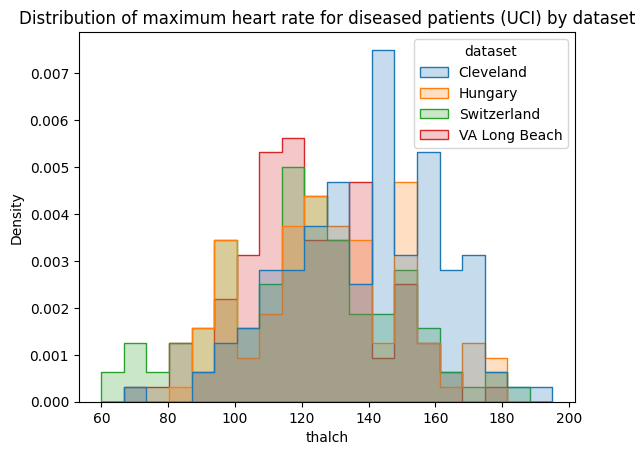

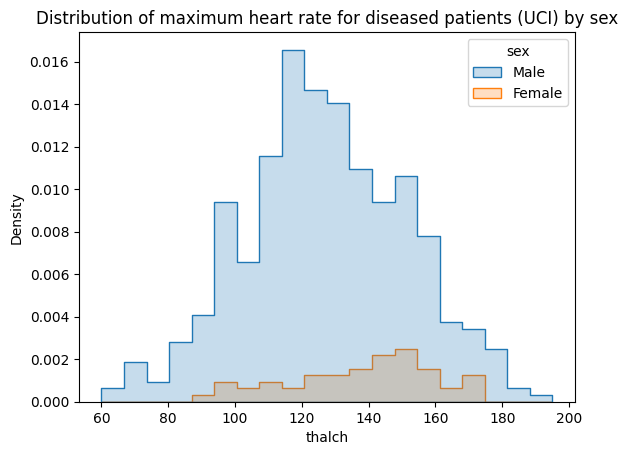

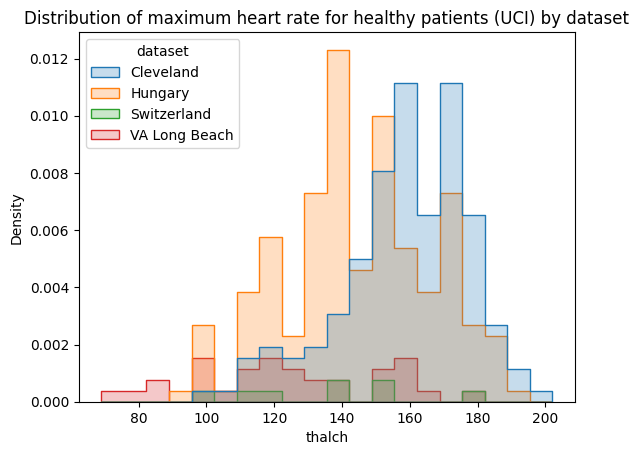

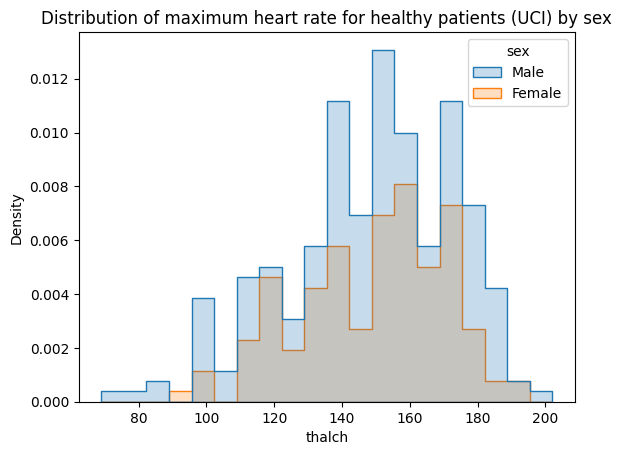

In [ ]:
# Filter for diseased patients in original UCI dataset
diseased_uci = uci[uci['num'] > 0].copy()

# Plot distribution of thalach for diseased patients in UCI by dataset
sns.histplot(data=diseased_uci, x='thalch', hue='dataset', bins=20, element='step', stat='density')
plt.title('Distribution of maximum heart rate for diseased patients (UCI) by dataset')
plt.show()

# Plot distribution of thalach for diseased patients in UCI by sex
sns.histplot(data=diseased_uci, x='thalch', hue='sex', bins=20, element='step', stat='density')
plt.title('Distribution of maximum heart rate for diseased patients (UCI) by sex')
plt.show()


# Filter for healthy patients in original UCI dataset
healthy_uci = uci[uci['num'] == 0].copy()

# Plot distribution of thalach for healthy patients in UCI by dataset
sns.histplot(data=healthy_uci, x='thalch', hue='dataset', bins=20, element='step', stat='density')
plt.title('Distribution of maximum heart rate for healthy patients (UCI) by dataset')
plt.show()

# Plot distribution of thalach for healthy patients in UCI by sex
sns.histplot(data=healthy_uci, x='thalch', hue='sex', bins=20, element='step', stat='density')
plt.title('Distribution of maximum heart rate for healthy patients (UCI) by sex')
plt.show()

In [ ]:
# Filter for diseased patients in original UCI dataset
diseased_uci = uci[uci['num'] > 0].copy()

# Calculate statistics for thalach for diseased patients in UCI by dataset
thalach_stats_diseased_by_dataset = diseased_uci.groupby('dataset')['thalch'].agg(['count', 'mean', 'std'])
print("UCI Dataset (Diseased Patients) - Maximum Heart Rate Statistics by Dataset:")
display(thalach_stats_diseased_by_dataset)

# Calculate statistics for thalach for diseased patients in UCI by sex
thalach_stats_diseased_by_sex = diseased_uci.groupby('sex')['thalch'].agg(['count', 'mean', 'std'])
print("\nUCI Dataset (Diseased Patients) - Maximum Heart Rate Statistics by Sex:")
display(thalach_stats_diseased_by_sex)


# Filter for healthy patients in original UCI dataset
healthy_uci = uci[uci['num'] == 0].copy()

# Calculate statistics for thalach for healthy patients in UCI by dataset
thalach_stats_healthy_by_dataset = healthy_uci.groupby('dataset')['thalch'].agg(['count', 'mean', 'std'])
print("\nUCI Dataset (Healthy Patients) - Maximum Heart Rate Statistics by Dataset:")
display(thalach_stats_healthy_by_dataset)

# Calculate statistics for thalach for healthy patients in UCI by sex
thalach_stats_healthy_by_sex = healthy_uci.groupby('sex')['thalch'].agg(['count', 'mean', 'std'])
print("\nUCI Dataset (Healthy Patients) - Maximum Heart Rate Statistics by Sex:")
display(thalach_stats_healthy_by_sex)

UCI Dataset (Diseased Patients) - Maximum Heart Rate Statistics by Dataset:


,count,mean,std
dataset,,,
Cleveland,139,139.258993,22.593233
Hungary,106,128.764151,22.612492
Switzerland,114,120.500000,25.772061
VA Long Beach,115,122.200000,20.061397



UCI Dataset (Diseased Patients) - Maximum Heart Rate Statistics by Sex:


,count,mean,std
sex,,,
Female,50,137.820000,21.820876
Male,424,127.134434,24.044843



UCI Dataset (Healthy Patients) - Maximum Heart Rate Statistics by Dataset:


,count,mean,std
dataset,,,
Cleveland,165,158.539394,19.252335
Hungary,186,144.790323,21.976501
Switzerland,8,136.625000,25.790017
VA Long Beach,32,124.937500,28.132105



UCI Dataset (Healthy Patients) - Maximum Heart Rate Statistics by Sex:


,count,mean,std
sex,,,
Female,142,149.211268,21.626039
Male,249,148.566265,24.707413


In [ ]:
# Filter for diseased patients in original UCI dataset
diseased_uci = uci[uci['num'] > 0].copy()

# Group by dataset and sex and count samples
diseased_counts_by_country_sex_uci = diseased_uci.groupby(['dataset', 'sex']).size().unstack(fill_value=0)

print("Number of diseased samples by country and sex (UCI dataset):")
display(diseased_counts_by_country_sex_uci)

Number of diseased samples by country and sex (UCI dataset):


sex,Female,Male
dataset,,
Cleveland,25,114
Hungary,12,94
Switzerland,10,105
VA Long Beach,3,146


In [ ]:
from scipy import stats

# Filter for diseased patients in original UCI dataset
diseased_uci = uci[uci['num'] > 0].copy()

# Filter for healthy patients in original UCI dataset
healthy_uci = uci[uci['num'] == 0].copy()

# Diseased patients from Cleveland vs. Hungary
cleveland_diseased_thalach = diseased_uci[diseased_uci['dataset'] == 'Cleveland']['thalch'].dropna()
hungary_diseased_thalach = diseased_uci[diseased_uci['dataset'] == 'Hungary']['thalch'].dropna()
t_stat_cleveland_hungary_diseased, p_val_cleveland_hungary_diseased = stats.ttest_ind(cleveland_diseased_thalach, hungary_diseased_thalach, equal_var=True) # Using standard t-test


# Diseased patients from Hungary vs. Switzerland
switzerland_diseased_thalach = diseased_uci[diseased_uci['dataset'] == 'Switzerland']['thalch'].dropna()
t_stat_hungary_switzerland_diseased, p_val_hungary_switzerland_diseased = stats.ttest_ind(hungary_diseased_thalach, switzerland_diseased_thalach, equal_var=True) # Using standard t-test

# Diseased patients from Hungary vs. VA Long Beach
va_long_beach_diseased_thalach = diseased_uci[diseased_uci['dataset'] == 'VA Long Beach']['thalch'].dropna()
t_stat_hungary_va_long_beach_diseased, p_val_hungary_va_long_beach_diseased = stats.ttest_ind(hungary_diseased_thalach, va_long_beach_diseased_thalach, equal_var=True) # Using standard t-test


# Create the first results DataFrame
results_table1_data = {
    'Comparison': ['Diseased: Cleveland vs. Hungary', 'Diseased: Hungary vs. Switzerland', 'Diseased: Hungary vs. VA Long Beach'],
    'Test Type': ["Student's t-test", "Student's t-test", "Student's t-test"],
    'T-statistic': [t_stat_cleveland_hungary_diseased, t_stat_hungary_switzerland_diseased, t_stat_hungary_va_long_beach_diseased],
    'P-value': [p_val_cleveland_hungary_diseased, p_val_hungary_switzerland_diseased, p_val_hungary_va_long_beach_diseased]
}
results_table1_df = pd.DataFrame(results_table1_data)
results_table1_df['P-value'] = results_table1_df['P-value'].map('{:.6f}'.format)

print("T-test Results for Maximum Heart Rate (Diseased Patients):")
display(results_table1_df)


# Healthy females vs. healthy males
female_healthy_thalach = healthy_uci[healthy_uci['sex'] == 'Female']['thalch'].dropna()
male_healthy_thalach = healthy_uci[healthy_uci['sex'] == 'Male']['thalch'].dropna()
t_stat_female_male_healthy, p_val_female_male_healthy = stats.ttest_ind(female_healthy_thalach, male_healthy_thalach, equal_var=True) # Using standard t-test


# Healthy patients from Cleveland vs. Healthy patients from Hungary
cleveland_healthy_thalach = healthy_uci[healthy_uci['dataset'] == 'Cleveland']['thalch'].dropna()
hungary_healthy_thalach = healthy_uci[healthy_uci['dataset'] == 'Hungary']['thalch'].dropna()
t_stat_cleveland_hungary_healthy, p_val_cleveland_hungary_healthy = stats.ttest_ind(cleveland_healthy_thalach, hungary_healthy_thalach, equal_var=True) # Using standard t-test


# Create the second results DataFrame
results_table2_data = {
    'Comparison': ['Healthy: Female vs. Male', 'Healthy: Cleveland vs. Hungary'],
    'Test Type': ["Student's t-test", "Student's t-test"],
    'T-statistic': [t_stat_female_male_healthy, t_stat_cleveland_hungary_healthy],
    'P-value': [p_val_female_male_healthy, p_val_cleveland_hungary_healthy]
}
results_table2_df = pd.DataFrame(results_table2_data)
results_table2_df['P-value'] = results_table2_df['P-value'].map('{:.6f}'.format)


print("\nT-test Results for Maximum Heart Rate (Healthy Patients):")
display(results_table2_df)

T-test Results for Maximum Heart Rate (Diseased Patients):


,Comparison,Test Type,T-statistic,P-value
0,Diseased: Cleveland vs. Hungary,Student's t-test,3.600931,0.000384
1,Diseased: Hungary vs. Switzerland,Student's t-test,2.520332,0.012441
2,Diseased: Hungary vs. VA Long Beach,Student's t-test,2.286352,0.023190



T-test Results for Maximum Heart Rate (Healthy Patients):


,Comparison,Test Type,T-statistic,P-value
0,Healthy: Female vs. Male,Student's t-test,0.259493,0.795392
1,Healthy: Cleveland vs. Hungary,Student's t-test,6.198531,0.000000


In [ ]:
# Filter for diseased patients in original UCI dataset
diseased_uci = uci[uci['num'] > 0].copy()

# Calculate statistics for age for diseased patients in UCI by dataset
age_stats_diseased_by_dataset = diseased_uci.groupby('dataset')['age'].agg(['count', 'mean', 'std'])
print("UCI Dataset (Diseased Patients) - Age Statistics by Dataset:")
display(age_stats_diseased_by_dataset)

# Filter for healthy patients in original UCI dataset
healthy_uci = uci[uci['num'] == 0].copy()

# Calculate statistics for age for healthy patients in UCI by dataset
age_stats_healthy_by_dataset = healthy_uci.groupby('dataset')['age'].agg(['count', 'mean', 'std'])
print("\nUCI Dataset (Healthy Patients) - Age Statistics by Dataset:")
display(age_stats_healthy_by_dataset)

UCI Dataset (Diseased Patients) - Age Statistics by Dataset:


,count,mean,std
dataset,,,
Cleveland,139,56.625899,7.938416
Hungary,106,49.481132,7.493783
Switzerland,115,55.365217,8.965167
VA Long Beach,149,60.214765,7.173114



UCI Dataset (Healthy Patients) - Age Statistics by Dataset:


,count,mean,std
dataset,,,
Cleveland,165,52.436364,9.674136
Hungary,187,46.994652,7.749781
Switzerland,8,54.625000,10.595653
VA Long Beach,51,56.823529,9.045896


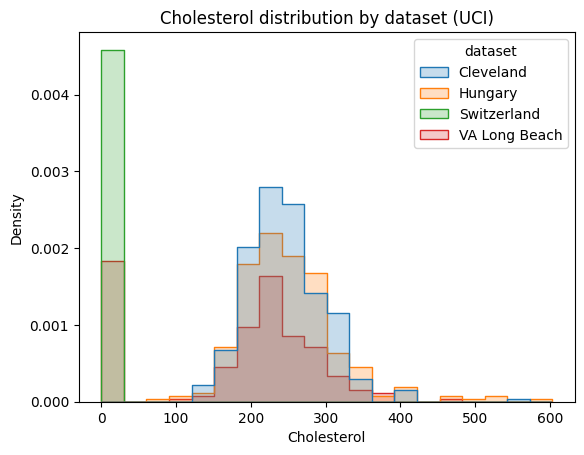

In [ ]:



# Plot distribution of cholesterol by dataset within UCI
sns.histplot(data=uci, x='chol', hue='dataset', bins=20, element='step', stat='density')
plt.title('Cholesterol distribution by dataset (UCI)')
plt.xlabel('Cholesterol')
plt.ylabel('Density')
plt.show()

In [ ]:
# Filter for the UCI dataset and exclude 0 cholesterol values
uci_data_filtered = uci[uci['chol'] != 0].copy()
uci_data_filtered = uci_data_filtered[uci_data_filtered['num'] > 0]

# Calculate statistics for cholesterol for each dataset within UCI
chol_stats_by_dataset_uci = uci_data_filtered.groupby('dataset')['chol'].agg(['count', 'mean', 'std'])

print("UCI Dataset (Excluding 0 Cholesterol) - Cholesterol Statistics by Dataset:")
print(chol_stats_by_dataset_uci)

UCI Dataset (Excluding 0 Cholesterol) - Cholesterol Statistics by Dataset:
               count        mean        std
dataset                                    
Cleveland        139  251.474820  49.486835
Hungary          101  269.188119  79.911165
VA Long Beach    106  242.867925  49.180344


In [ ]:
# Filter for the UCI dataset and exclude 0 cholesterol values

# Separate data for each dataset within UCI
cleveland_chol = uci_data_filtered[uci_data_filtered['dataset'] == 'Cleveland']['chol'].dropna()
va_long_beach_chol = uci_data_filtered[uci_data_filtered['dataset'] == 'VA Long Beach']['chol'].dropna()
hungary_chol = uci_data_filtered[uci_data_filtered['dataset'] == 'Hungary']['chol'].dropna()

# Perform independent samples t-test for Cleveland vs VA Long Beach (assuming equal variances)
t_stat_cleveland_va, p_val_cleveland_va = stats.ttest_ind(cleveland_chol, va_long_beach_chol, equal_var=True)

# Perform independent samples t-test for Cleveland vs Hungary (Welch's t-test, unequal variances)
t_stat_cleveland_hungary, p_val_cleveland_hungary = stats.ttest_ind(cleveland_chol, hungary_chol, equal_var=False)

# Perform independent samples t-test for VA Long Beach vs Hungary (Welch's t-test, unequal variances)
t_stat_va_hungary, p_val_va_hungary = stats.ttest_ind(va_long_beach_chol, hungary_chol, equal_var=False)


# Create a DataFrame to display the results
results_df = pd.DataFrame({
    'Comparison': ['Cleveland vs VA Long Beach', 'Cleveland vs Hungary', 'VA Long Beach vs Hungary'],
    'Test Type': ["Student's t-test", "Welch's t-test", "Welch's t-test"],
    'T-statistic': [t_stat_cleveland_va, t_stat_cleveland_hungary, t_stat_va_hungary],
    'P-value': [p_val_cleveland_va, p_val_cleveland_hungary, p_val_va_hungary]
})

print("Statistical Test Results for Cholesterol Levels within UCI Datasets:")
display(results_df)

Statistical Test Results for Cholesterol Levels within UCI Datasets:


,Comparison,Test Type,T-statistic,P-value
0,Cleveland vs VA Long Beach,Student's t-test,1.352371,0.177514
1,Cleveland vs Hungary,Welch's t-test,-1.970042,0.050618
2,VA Long Beach vs Hungary,Welch's t-test,-2.837459,0.005119


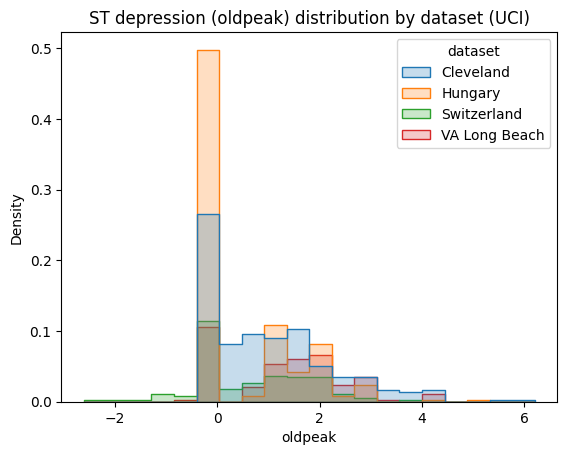

In [ ]:
# Filter for diseased patients in original UCI dataset
diseased_uci = uci[uci['num'] > 0].copy()

# Calculate statistics for oldpeak for diseased patients in UCI by dataset
oldpeak_stats_diseased_by_dataset = diseased_uci.groupby('dataset')['oldpeak'].agg(['count', 'mean', 'std'])
print("UCI Dataset (Diseased Patients) - Oldpeak Statistics by Dataset:")
display(oldpeak_stats_diseased_by_dataset)

# Filter for healthy patients in original UCI dataset
healthy_uci = uci[uci['num'] == 0].copy()

# Calculate statistics for oldpeak for healthy patients in UCI by dataset
oldpeak_stats_healthy_by_dataset = healthy_uci.groupby('dataset')['oldpeak'].agg(['count', 'mean', 'std'])
print("\nUCI Dataset (Healthy Patients) - Oldpeak Statistics by Dataset:")
display(oldpeak_stats_healthy_by_dataset)

UCI Dataset (Diseased Patients) - Oldpeak Statistics by Dataset:


,count,mean,std
dataset,,,
Cleveland,139,1.574101,1.302580
Hungary,106,1.245283,1.053894
Switzerland,109,0.662385,1.063954
VA Long Beach,114,1.472807,1.108079



UCI Dataset (Healthy Patients) - Oldpeak Statistics by Dataset:


,count,mean,std
dataset,,,
Cleveland,165,0.583030,0.780683
Hungary,187,0.215508,0.534835
Switzerland,8,0.537500,0.999911
VA Long Beach,30,0.743333,0.902366


In [ ]:
from scipy.stats import mannwhitneyu
import pandas as pd

# Filter for healthy patients in original UCI dataset
healthy_uci = uci[uci['num'] == 0].copy()

# Healthy patients from VA Long Beach vs. Healthy patients from Cleveland (oldpeak)
va_long_beach_healthy_oldpeak = healthy_uci[healthy_uci['dataset'] == 'VA Long Beach']['oldpeak'].dropna()
cleveland_healthy_oldpeak = healthy_uci[healthy_uci['dataset'] == 'Cleveland']['oldpeak'].dropna()

u_stat_va_cleveland_healthy, p_val_va_cleveland_healthy = mannwhitneyu(va_long_beach_healthy_oldpeak, cleveland_healthy_oldpeak, alternative='two-sided')

# Create a DataFrame to display the results
results_table_u_test_additional = pd.DataFrame({
    'Comparison': ['Healthy: VA Long Beach vs. Cleveland (oldpeak)'],
    'Test Type': ["Mann-Whitney U"],
    'U-statistic': [u_stat_va_cleveland_healthy],
    'P-value': [p_val_va_cleveland_healthy]
})

print("Additional Mann-Whitney U Test Results for Oldpeak (Healthy Patients):")
display(results_table_u_test_additional)

Additional Mann-Whitney U Test Results for Oldpeak (Healthy Patients):


,Comparison,Test Type,U-statistic,P-value
0,Healthy: VA Long Beach vs. Cleveland (oldpeak),Mann-Whitney U,2597.0,0.653745


In [ ]:
from scipy.stats import mannwhitneyu
import pandas as pd

# Filter for diseased patients in original UCI dataset
diseased_uci = uci[uci['num'] > 0].copy()

# Filter for healthy patients in original UCI dataset
healthy_uci = uci[uci['num'] == 0].copy()

# 1 - Diseased patients from Cleveland vs. Switzerland (oldpeak)
cleveland_diseased_oldpeak = diseased_uci[diseased_uci['dataset'] == 'Cleveland']['oldpeak'].dropna()
switzerland_diseased_oldpeak = diseased_uci[diseased_uci['dataset'] == 'Switzerland']['oldpeak'].dropna()
u_stat_cleveland_switzerland_diseased, p_val_cleveland_switzerland_diseased = mannwhitneyu(cleveland_diseased_oldpeak, switzerland_diseased_oldpeak, alternative='two-sided')


# 2 - Healthy patients from Cleveland vs. Healthy patients from Hungary (oldpeak)
cleveland_healthy_oldpeak = healthy_uci[healthy_uci['dataset'] == 'Cleveland']['oldpeak'].dropna()
hungary_healthy_oldpeak = healthy_uci[healthy_uci['dataset'] == 'Hungary']['oldpeak'].dropna()
u_stat_cleveland_hungary_healthy, p_val_cleveland_hungary_healthy = mannwhitneyu(cleveland_healthy_oldpeak, hungary_healthy_oldpeak, alternative='two-sided')


# Create a DataFrame to display the results
results_table_u_test = pd.DataFrame({
    'Comparison': ['Diseased: Cleveland vs. Switzerland (oldpeak)', 'Healthy: Cleveland vs. Hungary (oldpeak)'],
    'Test Type': ["Mann-Whitney U", "Mann-Whitney U"],
    'U-statistic': [u_stat_cleveland_switzerland_diseased, u_stat_cleveland_hungary_healthy],
    'P-value': [p_val_cleveland_switzerland_diseased, p_val_cleveland_hungary_healthy]
})

print("Mann-Whitney U Test Results for Oldpeak:")
display(results_table_u_test)

Mann-Whitney U Test Results for Oldpeak:


,Comparison,Test Type,U-statistic,P-value
0,Diseased: Cleveland vs. Switzerland (oldpeak),Mann-Whitney U,10572.5,6.639807e-08
1,Healthy: Cleveland vs. Hungary (oldpeak),Mann-Whitney U,21008.0,5.231836e-12


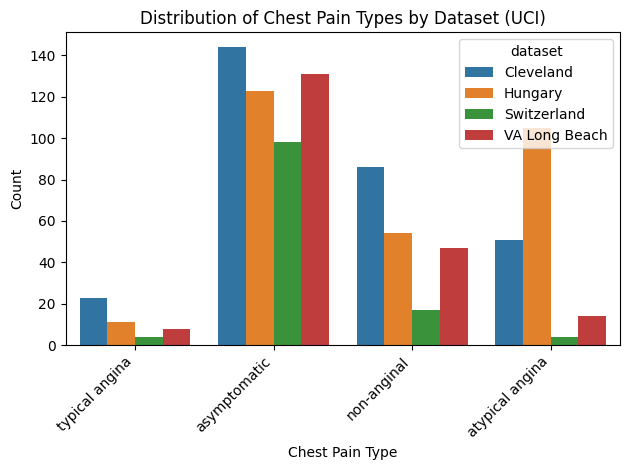

In [ ]:
# Plot distribution of chest pain types by dataset within UCI
sns.countplot(data=uci, x='cp', hue='dataset')
plt.title('Distribution of Chest Pain Types by Dataset (UCI)')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import chi2_contingency
import pandas as pd

# Filter for the UCI dataset (although the original uci dataframe is already filtered)
uci_data = uci.copy()

# Create a contingency table of chest pain type and dataset
cp_dataset_contingency = pd.crosstab(uci_data['cp'], uci_data['dataset'])

# Perform the Chi-square test
chi2_cp_dataset, p_cp_dataset, dof_cp_dataset, expected_cp_dataset = chi2_contingency(cp_dataset_contingency)

# Create a DataFrame to display the results
results_table_chi2_cp_dataset = pd.DataFrame({
    'Comparison': ['Chest Pain Type vs. Dataset (UCI)'],
    'Test Type': ["Chi-square"],
    'Chi2 Statistic': [chi2_cp_dataset],
    'P-value': [p_cp_dataset],
    'Degrees of Freedom': [dof_cp_dataset]
})

print("Chi-square Test Results for Chest Pain Type and Dataset (UCI):")
display(results_table_chi2_cp_dataset)

Chi-square Test Results for Chest Pain Type and Dataset (UCI):


,Comparison,Test Type,Chi2 Statistic,P-value,Degrees of Freedom
0,Chest Pain Type vs. Dataset (UCI),Chi-square,123.408568,2.676435e-22,9


# 2 DATASETS

In [ ]:
# Preprocess UCI dataset
uci_df = uci.copy()
uci_df['sex'] = uci_df['sex'].map({'Male':1,'Female':0})
cp_map = {val:i for i,val in enumerate(uci_df['cp'].dropna().unique())}
uci_df['cp_num'] = uci_df['cp'].map(cp_map)
uci_df['fbs'] = uci_df['fbs'].replace({True:1, False:0, 'True':1, 'False':0, '1':1, '0':0})
uci_df['exang'] = uci_df['exang'].replace({'yes':1,'no':0,'True':1,'False':0})
rest_map = {val:i for i,val in enumerate(uci_df['restecg'].dropna().unique())}
uci_df['restecg_num'] = uci_df['restecg'].map(rest_map)
slope_map = {val:i for i,val in enumerate(uci_df['slope'].dropna().unique())}
uci_df['slope_num'] = uci_df['slope'].map(slope_map)
uci_df['chol'] = uci_df['chol']
uci_df['thalach'] = uci_df['thalch']
uci_df['target_bin'] = (uci_df['num']>0).astype(int)
uci_processed = uci_df[['age','sex','cp_num','trestbps','chol','fbs','restecg_num','thalach','exang','oldpeak','slope_num','target_bin']].copy()
uci_processed['source'] = 'UCI'

# Preprocess Heart Attack dataset
ha_df = ha.copy().rename(columns={'cholesterol':'chol','max heart rate':'thalach'})
ha_df['sex'] = ha_df['sex'].astype(int)
ha_df['cp_num'] = ha_df['Chest pain type'] - 1
ha_df['fbs'] = ha_df['fasting blood sugar'].astype(int)
ha_df['restecg_num'] = ha_df['resting ecg'].astype(int)
ha_df['slope_num'] = ha_df['ST slope'] - 1
ha_df['exang'] = ha_df['exercise angina'].astype(int)
ha_df['target_bin'] = (ha_df['target']>0).astype(int)
ha_processed = ha_df[['age','sex','cp_num','trestbps','chol','fbs','restecg_num','thalach','exang','oldpeak','slope_num','target_bin']].copy()
ha_processed['source'] = 'Mendeley'

# Combine datasets
combined = pd.concat([uci_processed, ha_processed], ignore_index=True)
combined.head()

/tmp/ipython-input-890117189.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  uci_df['fbs'] = uci_df['fbs'].replace({True:1, False:0, 'True':1, 'False':0, '1':1, '0':0})


,age,sex,cp_num,trestbps,chol,fbs,restecg_num,thalach,exang,oldpeak,slope_num,target_bin,source
0,63,1,0,145.0,233.0,1.0,0.0,150.0,False,2.3,0.0,0,UCI
1,67,1,1,160.0,286.0,0.0,0.0,108.0,True,1.5,1.0,1,UCI
2,67,1,1,120.0,229.0,0.0,0.0,129.0,True,2.6,1.0,1,UCI
3,37,1,2,130.0,250.0,0.0,1.0,187.0,False,3.5,0.0,0,UCI
4,41,0,3,130.0,204.0,0.0,0.0,172.0,False,1.4,2.0,0,UCI


In [ ]:
# Treat zeros as missing for selected numeric variables and fill with median
num_cols = ['trestbps','chol','thalach','oldpeak']
for col in num_cols:
    combined[col] = combined[col].replace(0, np.nan)
    combined[col] = combined[col].fillna(combined[col].median())

# Show info
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2683 entries, 0 to 2682
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          2683 non-null   int64  
 1   sex          2683 non-null   int64  
 2   cp_num       2683 non-null   int64  
 3   trestbps     2683 non-null   float64
 4   chol         2683 non-null   float64
 5   fbs          2593 non-null   float64
 6   restecg_num  2681 non-null   float64
 7   thalach      2683 non-null   float64
 8   exang        2628 non-null   object 
 9   oldpeak      2683 non-null   float64
 10  slope_num    2374 non-null   float64
 11  target_bin   2683 non-null   int64  
 12  source       2683 non-null   object 
dtypes: float64(7), int64(4), object(2)
memory usage: 272.6+ KB


In [ ]:
# Descriptive statistics
combined.groupby('target_bin')[['age','trestbps','chol','thalach','oldpeak']].describe().transpose()

target_bin                0            1
age      count  1136.000000  1547.000000
         mean     51.126761    55.765352
         std       9.489050     8.691039
         min      28.000000    29.000000
         25%      44.000000    50.000000
         50%      52.000000    57.000000
         75%      57.250000    62.000000
         max      76.000000    77.000000
trestbps count  1136.000000  1547.000000
         mean    129.759683   133.753717
         std      16.423133    18.726726
         min      80.000000    92.000000
         25%     120.000000   120.000000
         50%     130.000000   130.000000
         75%     140.000000   144.000000
         max     190.000000   200.000000
chol     count  1136.000000  1547.000000
         mean    240.538732   249.659341
         std      53.537177    51.036358
         min      85.000000   100.000000
         25%     208.000000   223.000000
         50%     236.000000   240.000000
         75%     267.000000   274.000000
         max     564.000000   603.000000
thalach  count  1136.000000  1547.000000
         mean    151.115317   133.937298
         std      22.571197    24.670571
         min      69.000000    60.000000
         25%     138.000000   117.000000
         50%     154.000000   134.000000
         75%     169.000000   152.000000
         max     202.000000   202.000000
oldpeak  count  1136.000000  1547.000000
         mean      1.255106     1.631674
         std       0.534526     0.934916
         min      -1.100000    -2.600000
         25%       1.100000     1.200000
         50%       1.400000     1.400000
         75%       1.400000     2.000000
         max       4.200000     6.200000

In [ ]:
# T-tests between disease groups
results = {}
for col in ['age','trestbps','chol','thalach','oldpeak']:
    group_no = combined[combined['target_bin']==0][col]
    group_yes = combined[combined['target_bin']==1][col]
    t_stat, p_val = stats.ttest_ind(group_no, group_yes, equal_var=False)
    results[col] = {'mean_no': group_no.mean(), 'mean_yes': group_yes.mean(), 't_stat': t_stat, 'p_value': p_val}

results

{'age': {'mean_no': np.float64(51.12676056338028),
  'mean_yes': np.float64(55.76535229476406),
  't_stat': np.float64(-12.960772840307218),
  'p_value': np.float64(3.85639227668042e-37)},
 'trestbps': {'mean_no': np.float64(129.75968309859155),
  'mean_yes': np.float64(133.75371687136393),
  't_stat': np.float64(-5.862688582074797),
  'p_value': np.float64(5.1307410595052e-09)},
 'chol': {'mean_no': np.float64(240.5387323943662),
  'mean_yes': np.float64(249.65934065934067),
  't_stat': np.float64(-4.446799629268557),
  'p_value': np.float64(9.116621365825565e-06)},
 'thalach': {'mean_no': np.float64(151.11531690140845),
  'mean_yes': np.float64(133.93729799612152),
  't_stat': np.float64(18.721616927541817),
  'p_value': np.float64(2.1487708497616627e-73)},
 'oldpeak': {'mean_no': np.float64(1.2551056338028168),
  'mean_yes': np.float64(1.6316742081447964),
  't_stat': np.float64(-13.178333758037352),
  'p_value': np.float64(2.0628030293314588e-38)}}

In [ ]:
# Chi-square tests for categorical variables vs target
cat_cols = ['sex','cp_num','fbs','restecg_num','exang','slope_num']
chi2_results = {}
for col in cat_cols:
    contingency = pd.crosstab(combined[col], combined['target_bin'])
    chi2, p, dof, expected = stats.chi2_contingency(contingency)
    chi2_results[col] = {'chi2': chi2, 'p_value': p, 'dof': dof}
chi2_results

{'sex': {'chi2': np.float64(179.19852247500677),
  'p_value': np.float64(7.251326967790546e-41),
  'dof': 1},
 'cp_num': {'chi2': np.float64(95.94285753955066),
  'p_value': np.float64(7.181513335586834e-20),
  'dof': 4},
 'fbs': {'chi2': np.float64(54.10285312656738),
  'p_value': np.float64(1.902647917801577e-13),
  'dof': 1},
 'restecg_num': {'chi2': np.float64(26.092355088831663),
  'p_value': np.float64(2.158326199256924e-06),
  'dof': 2},
 'exang': {'chi2': np.float64(456.7896387804971),
  'p_value': np.float64(2.4017432408108822e-101),
  'dof': 1},
 'slope_num': {'chi2': np.float64(351.9054227428472),
  'p_value': np.float64(5.768864276531165e-76),
  'dof': 3}}

In [ ]:
# Compare numeric variables between UCI and Mendeley
uci_data = combined[combined['source']=='UCI']
ha_data  = combined[combined['source']=='Mendeley']
compare_results = {}
for col in ['age','trestbps','chol','thalach','oldpeak']:
    t_stat, p_val = stats.ttest_ind(uci_data[col], ha_data[col], equal_var=False)
    compare_results[col] = {'mean_UCI': uci_data[col].mean(), 'mean_Mendeley': ha_data[col].mean(), 'p_value': p_val}
compare_results

{'age': {'mean_UCI': np.float64(53.51086956521739),
  'mean_Mendeley': np.float64(53.952921157118546),
  'p_value': np.float64(0.2462635609598423)},
 'trestbps': {'mean_UCI': np.float64(132.13695652173914),
  'mean_Mendeley': np.float64(132.02382302892795),
  'p_value': np.float64(0.8766107209525226)},
 'chol': {'mean_UCI': np.float64(245.33260869565217),
  'mean_Mendeley': np.float64(246.04027226318775),
  'p_value': np.float64(0.7382053068656909)},
 'thalach': {'mean_UCI': np.float64(137.87173913043478),
  'mean_Mendeley': np.float64(142.95292115711854),
  'p_value': np.float64(7.51194433620728e-07)},
 'oldpeak': {'mean_UCI': np.float64(1.4769565217391303),
  'mean_Mendeley': np.float64(1.469767441860465),
  'p_value': np.float64(0.8218779872626113)}}

In [ ]:
# Chi-square for categorical variables between datasets
chi2_dataset = {}
for col in ['sex','cp_num','fbs','restecg_num','exang','slope_num','target_bin']:
    contingency = pd.crosstab(combined['source'], combined[col])
    chi2, p, dof, expected = stats.chi2_contingency(contingency)
    chi2_dataset[col] = {'chi2': chi2, 'p_value': p, 'dof': dof}
chi2_dataset

{'sex': {'chi2': np.float64(8.84188895204935),
  'p_value': np.float64(0.00294394289264003),
  'dof': 1},
 'cp_num': {'chi2': np.float64(356.26692665547654),
  'p_value': np.float64(7.776721691771998e-76),
  'dof': 4},
 'fbs': {'chi2': np.float64(2.3749239737602617),
  'p_value': np.float64(0.12329760045148322),
  'dof': 1},
 'restecg_num': {'chi2': np.float64(747.4000489528302),
  'p_value': np.float64(5.059894744568546e-163),
  'dof': 2},
 'exang': {'chi2': np.float64(1.0516007931830007),
  'p_value': np.float64(0.30513869770649926),
  'dof': 1},
 'slope_num': {'chi2': np.float64(497.3459930402655),
  'p_value': np.float64(1.7940303741115748e-107),
  'dof': 3},
 'target_bin': {'chi2': np.float64(2.978379977206533),
  'p_value': np.float64(0.08438369510148441),
  'dof': 1}}

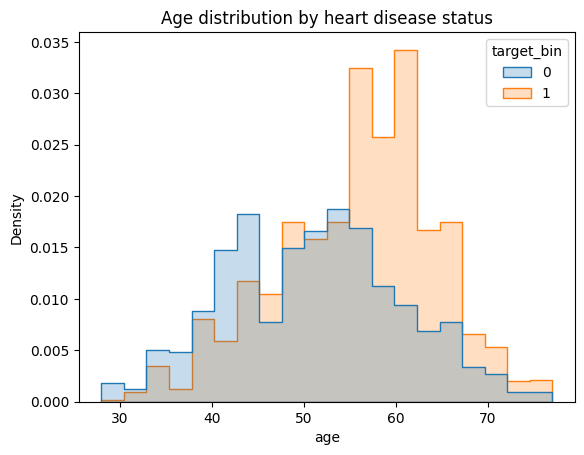

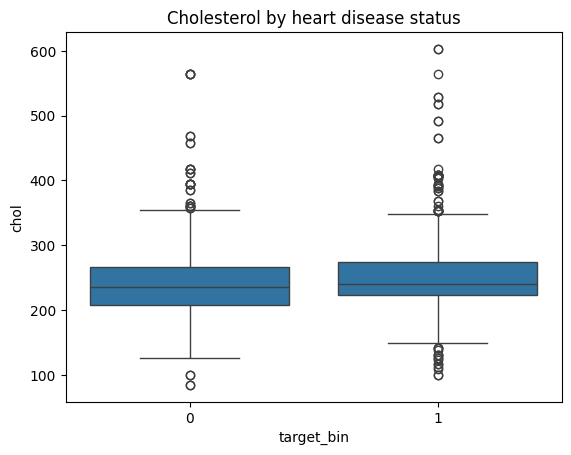

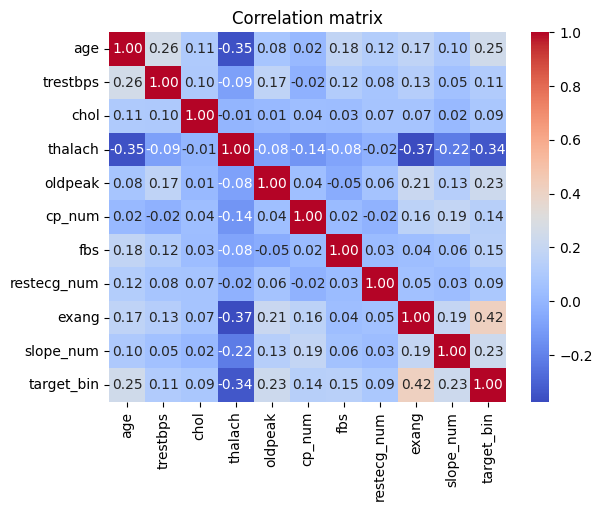

In [ ]:
# Plot age distribution by disease
sns.histplot(data=combined, x='age', hue='target_bin', bins=20, element='step', stat='density')
plt.title('Age distribution by heart disease status')
plt.show()

# Plot cholesterol boxplot
sns.boxplot(data=combined, x='target_bin', y='chol')
plt.title('Cholesterol by heart disease status')
plt.show()

# Correlation heatmap
corr = combined[['age','trestbps','chol','thalach','oldpeak','cp_num','fbs','restecg_num','exang','slope_num','target_bin']].corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()


## Additional Statistical Tests

To deepen the statistical analysis and illustrate more of the tests covered in the course, the following additional tests are performed below:

* **Normality tests** using the Shapiro‑Wilk test and the Kolmogorov–Smirnov test.
* **Variance tests** using Levene's test to assess equality of variances across datasets.
* **ANOVA** to compare mean cholesterol levels across different chest pain types.
* **Two‑proportion z‑test** to compare heart disease prevalence between sexes.
* **Non‑parametric test** (Mann–Whitney U) for comparing age distributions between sexes.


In [ ]:

# Normality tests for continuous variables
from scipy import stats

shapiro_results = {}
for col in ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']:
    stat, p = stats.shapiro(combined[col].dropna())
    shapiro_results[col] = {'shapiro_stat': stat, 'p_value': p}
shapiro_results

# Kolmogorov–Smirnov test for normality of age
from scipy.stats import kstest, norm
age_mean, age_std = combined['age'].mean(), combined['age'].std()
ks_stat, ks_p = kstest(combined['age'], 'norm', args=(age_mean, age_std))
{'ks_stat': ks_stat, 'p_value': ks_p}


{'ks_stat': np.float64(0.06086780455854168),
 'p_value': np.float64(4.395583557271835e-09)}

In [ ]:

# Test for equal variances between UCI and Mendeley datasets
from scipy.stats import levene
variance_results = {}
for col in ['age','trestbps','chol','thalach','oldpeak']:
    stat, p = levene(uci_data[col].dropna(), ha_data[col].dropna())
    variance_results[col] = {'levene_stat': stat, 'p_value': p}
variance_results


{'age': {'levene_stat': np.float64(0.030475601937930617),
  'p_value': np.float64(0.861428640423741)},
 'trestbps': {'levene_stat': np.float64(0.46604768061466195),
  'p_value': np.float64(0.49487004302816073)},
 'chol': {'levene_stat': np.float64(5.198646387467825),
  'p_value': np.float64(0.022682678319740336)},
 'thalach': {'levene_stat': np.float64(0.5783845154741932),
  'p_value': np.float64(0.44701311388566056)},
 'oldpeak': {'levene_stat': np.float64(11.7913826812838),
  'p_value': np.float64(0.0006040888695256371)}}

In [ ]:

# One-way ANOVA for cholesterol across chest pain types
from scipy.stats import f_oneway
anova_groups = [combined[combined['cp_num']==g]['chol'].dropna() for g in combined['cp_num'].dropna().unique()]
f_stat, p_val = f_oneway(*anova_groups)
{'F_statistic': f_stat, 'p_value': p_val}


{'F_statistic': np.float64(3.032218181969176),
 'p_value': np.float64(0.01658014723199437)}

In [ ]:

# Two-proportion Z-test for difference in heart disease prevalence between sexes
import numpy as np
from scipy.stats import norm

contingency_sex = pd.crosstab(combined['sex'], combined['target_bin'])
success = contingency_sex[1].values  # number with disease
nobs = contingency_sex.sum(axis=1).values

# Compute pooled proportion and standard error
p_pool = (success[0] + success[1]) / (nobs[0] + nobs[1])
se = np.sqrt(p_pool * (1 - p_pool) * (1/nobs[0] + 1/nobs[1]))
prop1 = success[0] / nobs[0]
prop2 = success[1] / nobs[1]

z_stat = (prop1 - prop2) / se
p_val = 2 * norm.sf(abs(z_stat))
{'z_statistic': z_stat, 'p_value': p_val}


{'z_statistic': np.float64(-13.43189090529279),
 'p_value': np.float64(3.932404401777119e-41)}

In [ ]:

# Mann-Whitney U test for age difference between sexes
from scipy.stats import mannwhitneyu
age_female = combined[combined['sex']==0]['age']
age_male = combined[combined['sex']==1]['age']

m_stat, m_p = mannwhitneyu(age_female, age_male, alternative='two-sided')
{'U_statistic': m_stat, 'p_value': m_p}


{'U_statistic': np.float64(665910.0),
 'p_value': np.float64(0.9539206861189116)}


### Exploratory data analysis inspired by the original notebook

To align with the exploratory work in the provided Colab notebook, we include additional analyses:

* Correlations between each numeric variable and the binary target after dropping missing values for that variable.
* Distributions of resting blood pressure (trestbps) and ST‑segment depression (oldpeak) by disease status.
* Summary statistics (mean and standard deviation) of resting blood pressure for healthy and diseased patients.
* A χ² test for independence between chest‑pain type (cp_num) and sex.


In [ ]:

# Correlation between each numeric variable and the target after handling missing values per column
corr_results = {}
for col in ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']:
    subset = combined[['target_bin', col]].dropna()
    corr_results[col] = subset[col].corr(subset['target_bin'])

corr_results


{'age': np.float64(0.24590628872055798),
 'trestbps': np.float64(0.11030697658662053),
 'chol': np.float64(0.08619089193015694),
 'thalach': np.float64(-0.3359582578388753),
 'oldpeak': np.float64(0.22917530662761132)}

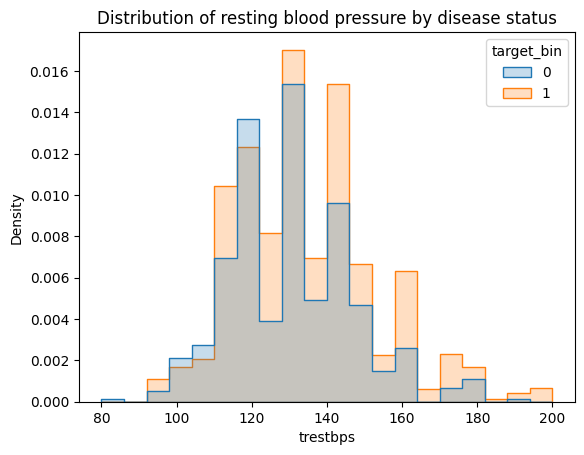

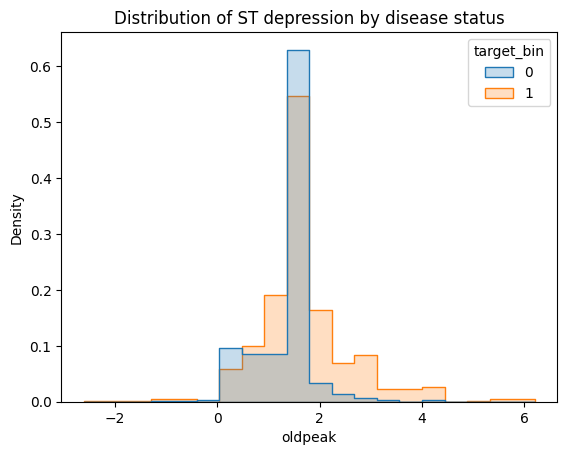

In [ ]:

# Distribution of resting blood pressure by heart disease status
sns.histplot(data=combined, x='trestbps', hue='target_bin', bins=20, element='step', stat='density')
plt.title('Distribution of resting blood pressure by disease status')
plt.show()

# Distribution of ST depression (oldpeak) by heart disease status
sns.histplot(data=combined, x='oldpeak', hue='target_bin', bins=20, element='step', stat='density')
plt.title('Distribution of ST depression by disease status')
plt.show()


In [ ]:

# Mean and standard deviation of resting blood pressure for healthy vs diseased patients
bp_group_stats = {
    'mean_healthy': combined.loc[combined['target_bin']==0, 'trestbps'].mean(),
    'mean_disease': combined.loc[combined['target_bin']==1, 'trestbps'].mean(),
    'std_healthy': combined.loc[combined['target_bin']==0, 'trestbps'].std(),
    'std_disease': combined.loc[combined['target_bin']==1, 'trestbps'].std()
}
bp_group_stats


{'mean_healthy': np.float64(129.75968309859155),
 'mean_disease': np.float64(133.75371687136393),
 'std_healthy': 16.42313275276374,
 'std_disease': 18.726726239057218}

In [ ]:

# Chi-square test for independence between chest pain type and sex
cp_sex_contingency = pd.crosstab(combined['cp_num'], combined['sex'])
chi2_cp_sex, p_cp_sex, dof_cp_sex, expected_cp_sex = stats.chi2_contingency(cp_sex_contingency)
{'chi2': chi2_cp_sex, 'p_value': p_cp_sex, 'dof': dof_cp_sex}


{'chi2': np.float64(14.991180919995223),
 'p_value': np.float64(0.004719543498314549),
 'dof': 4}

UCI Dataset (Diseased Patients - Resting Blood Pressure):
{'sample_size': np.int64(509), 'mean': np.float64(133.92927308447938), 'std_dev': 18.86469924542028}

Mendeley Dataset (Diseased Patients - Resting Blood Pressure):
{'sample_size': np.int64(1038), 'mean': np.float64(133.66763005780348), 'std_dev': 18.667220543653606}


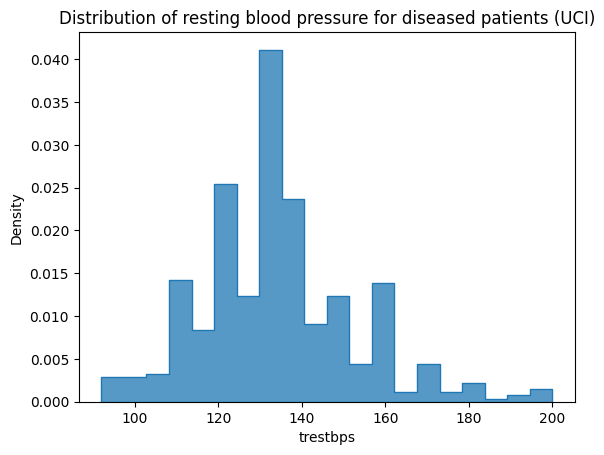

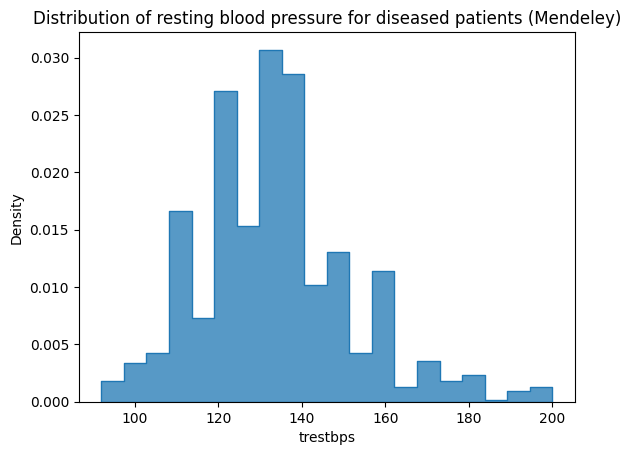

In [ ]:
# Filter for diseased patients
diseased_combined = combined[combined['target_bin'] == 1]

# Separate by source
diseased_uci = diseased_combined[diseased_combined['source'] == 'UCI']
diseased_ha = diseased_combined[diseased_combined['source'] == 'Mendeley']

# Calculate and print statistics for UCI dataset
uci_trestbps_stats = {
    'sample_size': diseased_uci['trestbps'].count(),
    'mean': diseased_uci['trestbps'].mean(),
    'std_dev': diseased_uci['trestbps'].std()
}
print("UCI Dataset (Diseased Patients - Resting Blood Pressure):")
print(uci_trestbps_stats)


# Calculate and print statistics for Mendeley dataset
ha_trestbps_stats = {
    'sample_size': diseased_ha['trestbps'].count(),
    'mean': diseased_ha['trestbps'].mean(),
    'std_dev': diseased_ha['trestbps'].std()
}
print("\nMendeley Dataset (Diseased Patients - Resting Blood Pressure):")
print(ha_trestbps_stats)


# Plot distribution for UCI dataset
sns.histplot(data=diseased_uci, x='trestbps', bins=20, element='step', stat='density')
plt.title('Distribution of resting blood pressure for diseased patients (UCI)')
plt.show()

# Plot distribution for Mendeley dataset
sns.histplot(data=diseased_ha, x='trestbps', bins=20, element='step', stat='density')
plt.title('Distribution of resting blood pressure for diseased patients (Mendeley)')
plt.show()

UCI Dataset (Diseased Patients - Maximum Heart Rate):
{'sample_size': np.int64(509), 'mean': np.float64(129.27504911591356), 'std_dev': 23.48049505188171}

Mendeley Dataset (Diseased Patients - Maximum Heart Rate):
{'sample_size': np.int64(1038), 'mean': np.float64(136.22350674373797), 'std_dev': 24.927786667768228}


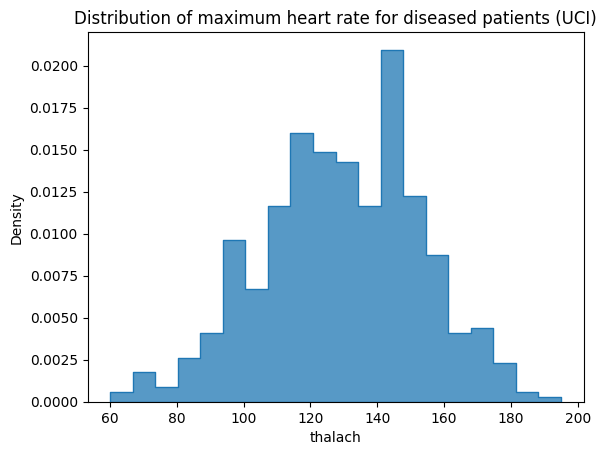

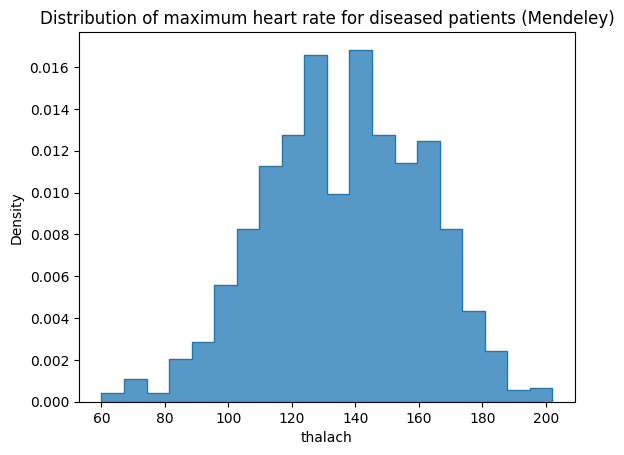

In [ ]:
# Filter for diseased patients
diseased_combined = combined[combined['target_bin'] == 1]

# Separate by source
diseased_uci = diseased_combined[diseased_combined['source'] == 'UCI']
diseased_ha = diseased_combined[diseased_combined['source'] == 'Mendeley']

# Calculate and print statistics for UCI dataset
uci_thalach_stats = {
    'sample_size': diseased_uci['thalach'].count(),
    'mean': diseased_uci['thalach'].mean(),
    'std_dev': diseased_uci['thalach'].std()
}
print("UCI Dataset (Diseased Patients - Maximum Heart Rate):")
print(uci_thalach_stats)


# Calculate and print statistics for Mendeley dataset
ha_thalach_stats = {
    'sample_size': diseased_ha['thalach'].count(),
    'mean': diseased_ha['thalach'].mean(),
    'std_dev': diseased_ha['thalach'].std()
}
print("\nMendeley Dataset (Diseased Patients - Maximum Heart Rate):")
print(ha_thalach_stats)


# Plot distribution for UCI dataset
sns.histplot(data=diseased_uci, x='thalach', bins=20, element='step', stat='density')
plt.title('Distribution of maximum heart rate for diseased patients (UCI)')
plt.show()

# Plot distribution for Mendeley dataset
sns.histplot(data=diseased_ha, x='thalach', bins=20, element='step', stat='density')
plt.title('Distribution of maximum heart rate for diseased patients (Mendeley)')
plt.show()

UCI Dataset (Healthy Patients - Maximum Heart Rate):
{'sample_size': np.int64(411), 'mean': np.float64(148.5182481751825), 'std_dev': 23.059552443073215}

Mendeley Dataset (Healthy Patients - Maximum Heart Rate):
{'sample_size': np.int64(725), 'mean': np.float64(152.58758620689656), 'std_dev': 22.17078637163838}


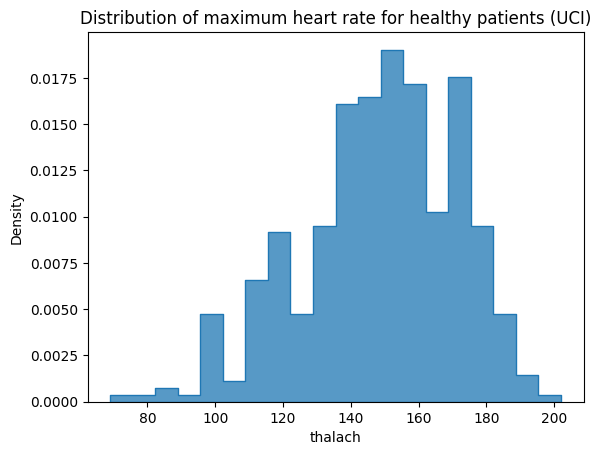

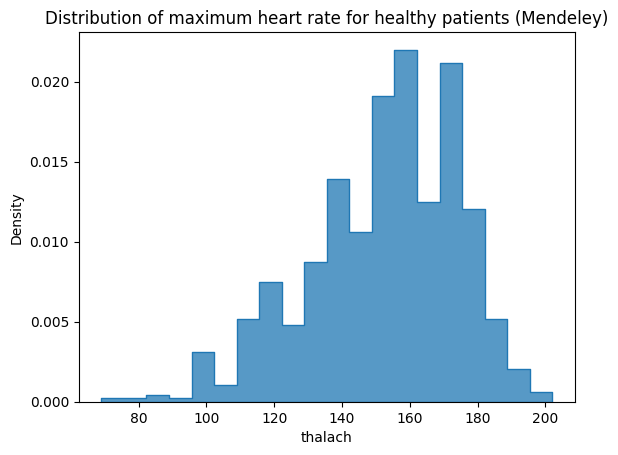

In [ ]:
# Filter for healthy patients
healthy_combined = combined[combined['target_bin'] == 0]

# Separate by source
healthy_uci = healthy_combined[healthy_combined['source'] == 'UCI']
healthy_ha = healthy_combined[healthy_combined['source'] == 'Mendeley']

# Calculate and print statistics for UCI dataset
uci_thalach_stats_healthy = {
    'sample_size': healthy_uci['thalach'].count(),
    'mean': healthy_uci['thalach'].mean(),
    'std_dev': healthy_uci['thalach'].std()
}
print("UCI Dataset (Healthy Patients - Maximum Heart Rate):")
print(uci_thalach_stats_healthy)


# Calculate and print statistics for Mendeley dataset
ha_thalach_stats_healthy = {
    'sample_size': healthy_ha['thalach'].count(),
    'mean': healthy_ha['thalach'].mean(),
    'std_dev': healthy_ha['thalach'].std()
}
print("\nMendeley Dataset (Healthy Patients - Maximum Heart Rate):")
print(ha_thalach_stats_healthy)


# Plot distribution for UCI dataset
sns.histplot(data=healthy_uci, x='thalach', bins=20, element='step', stat='density')
plt.title('Distribution of maximum heart rate for healthy patients (UCI)')
plt.show()

# Plot distribution for Mendeley dataset
sns.histplot(data=healthy_ha, x='thalach', bins=20, element='step', stat='density')
plt.title('Distribution of maximum heart rate for healthy patients (Mendeley)')
plt.show()

In [ ]:
from scipy.stats import ttest_ind
import pandas as pd

# Filter for diseased patients
diseased_combined = combined[combined['target_bin'] == 1]

# Separate by source for diseased patients
diseased_uci_thalach = diseased_combined[diseased_combined['source'] == 'UCI']['thalach'].dropna()
diseased_ha_thalach = diseased_combined[diseased_combined['source'] == 'Mendeley']['thalach'].dropna()

# Perform one-sided t-test (Mendeley > UCI) for diseased patients
t_stat_diseased, p_val_diseased = ttest_ind(diseased_ha_thalach, diseased_uci_thalach, equal_var=True, alternative='greater')


# Filter for healthy patients
healthy_combined = combined[combined['target_bin'] == 0]

# Separate by source for healthy patients
healthy_uci_thalach = healthy_combined[healthy_combined['source'] == 'UCI']['thalach'].dropna()
healthy_ha_thalach = healthy_combined[healthy_combined['source'] == 'Mendeley']['thalach'].dropna()

# Perform one-sided t-test (Mendeley > UCI) for healthy patients
t_stat_healthy, p_val_healthy = ttest_ind(healthy_ha_thalach, healthy_uci_thalach, equal_var=True, alternative='greater')

# Create a DataFrame to display the results
results_data = {
    'Comparison': ['Diseased: Mendeley vs. UCI (one-sided)', 'Healthy: Mendeley vs. UCI (one-sided)'],
    'Test Type': ["Student's t-test", "Student's t-test"],
    'T-statistic': [t_stat_diseased, t_stat_healthy],
    'P-value': [p_val_diseased, p_val_healthy]
}
results_df = pd.DataFrame(results_data)

# Format the 'P-value' column to display up to 8 decimal places
results_df['P-value'] = results_df['P-value'].map('{:.8f}'.format)

print("One-sided t-test Results for Maximum Heart Rate (Mendeley > UCI):")
display(results_df)

One-sided t-test Results for Maximum Heart Rate (Mendeley > UCI):


,Comparison,Test Type,T-statistic,P-value
0,Diseased: Mendeley vs. UCI (one-sided),Student's t-test,5.249527,0.00000009
1,Healthy: Mendeley vs. UCI (one-sided),Student's t-test,2.929651,0.00173068


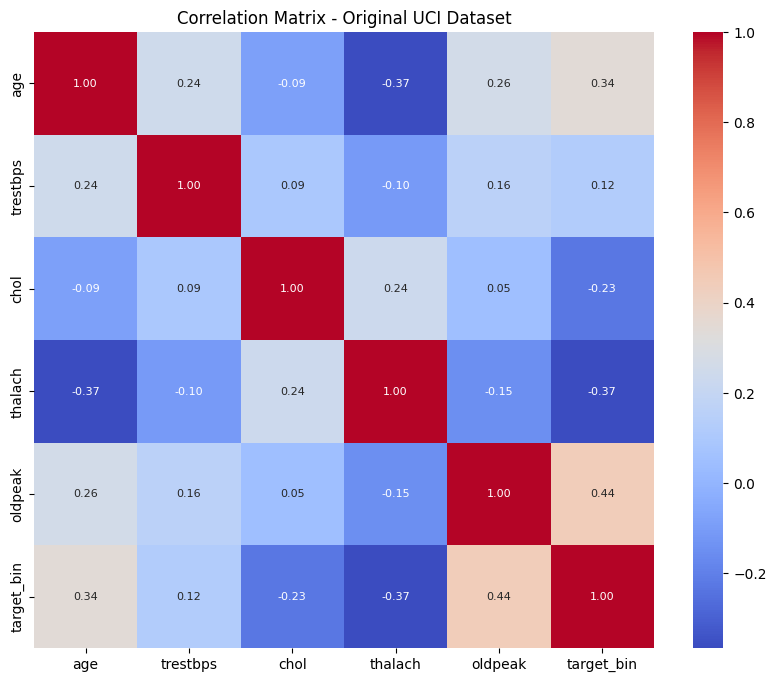

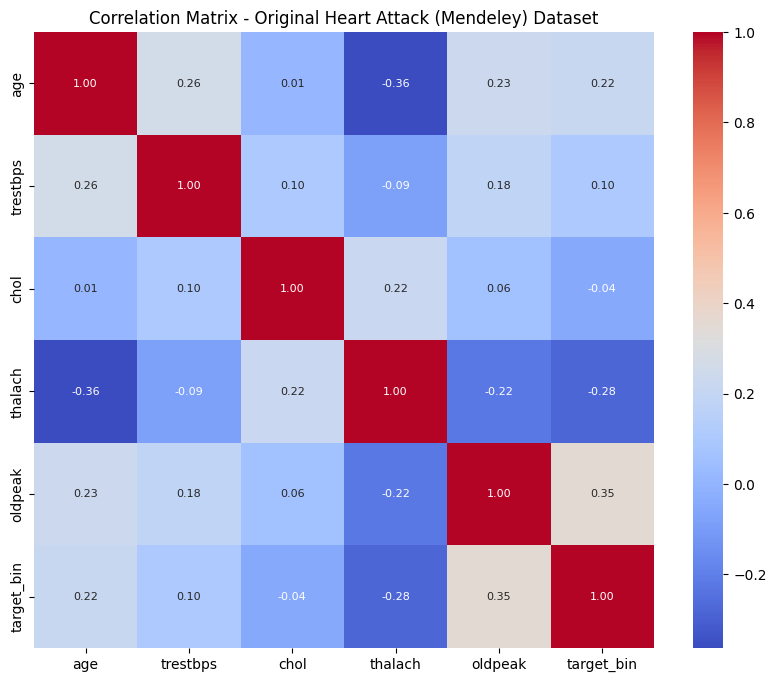

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation analysis from original dataframes
# Note: Need to handle non-numeric columns and potential missing values appropriately
# For simplicity, we'll select a common set of numeric-like columns that exist in both
uci_numeric = uci[['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'num']].copy()
# Rename 'num' to 'target_bin' in uci_numeric for consistency in heatmap if needed, or adjust title/annotation
uci_numeric = uci_numeric.rename(columns={'thalch': 'thalach', 'num': 'target_bin'})


ha_numeric = ha[['age', 'trestbps', 'cholesterol', 'max heart rate', 'oldpeak', 'target']].copy()
# Rename columns in ha_numeric for consistency
ha_numeric = ha_numeric.rename(columns={'cholesterol': 'chol', 'max heart rate': 'thalach', 'target': 'target_bin'})


# Calculate and plot heatmap for UCI dataset
plt.figure(figsize=(10, 8))
corr_uci = uci_numeric.corr()
sns.heatmap(corr_uci, annot=True, fmt='.2f', cmap='coolwarm', annot_kws={"size": 8})
plt.title('Correlation Matrix - Original UCI Dataset')
plt.show()

# Calculate and plot heatmap for Heart Attack (Mendeley) dataset
plt.figure(figsize=(10, 8))
corr_ha = ha_numeric.corr()
sns.heatmap(corr_ha, annot=True, fmt='.2f', cmap='coolwarm', annot_kws={"size": 8})
plt.title('Correlation Matrix - Original Heart Attack (Mendeley) Dataset')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Drop rows with missing values for simplicity in this example
combined_cleaned = combined.dropna().copy()

# Prepare data for classification
X = combined_cleaned.drop(['source', 'target_bin'], axis=1) # Features
y = combined_cleaned['source'] # Target

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Initialize and train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

    Mendeley       0.94      0.98      0.96       515
         UCI       0.94      0.80      0.87       177

    accuracy                           0.94       692
   macro avg       0.94      0.89      0.91       692
weighted avg       0.94      0.94      0.93       692

Accuracy Score: 0.9364161849710982


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

# Drop rows with missing values for simplicity in this example
combined_cleaned = combined.dropna().copy()

# Prepare data for regression (to predict the source)
X = combined_cleaned.drop('source', axis=1) # Features
y = combined_cleaned['source'] # Target

# Encode the target variable (source) to a numerical format
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Handle categorical variables in X - One-Hot Encoding
X = pd.get_dummies(X, columns=['sex', 'cp_num', 'fbs', 'restecg_num', 'exang',  'target_bin'], drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Initialize and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions (these will be continuous values)
y_pred_reg = model.predict(X_test)

# --- Classification based on Regression Predictions ---
# Define a threshold for classification. A common approach for binary classification
# using regression is to threshold at 0.5 if the encoded target is 0 and 1.
threshold = 0.5

# Classify predictions based on the threshold
y_pred_class = (y_pred_reg > threshold).astype(int)

# Evaluate the classification results
print("Classification Report (using Regression for Classification):")
print(classification_report(y_test, y_pred_class, target_names=le.classes_))
print("Accuracy Score (using Regression for Classification):", accuracy_score(y_test, y_pred_class))

Classification Report (using Regression for Classification):
              precision    recall  f1-score   support

    Mendeley       0.88      0.95      0.92       515
         UCI       0.82      0.63      0.71       177

    accuracy                           0.87       692
   macro avg       0.85      0.79      0.81       692
weighted avg       0.86      0.87      0.86       692

Accuracy Score (using Regression for Classification): 0.8684971098265896
